In [1]:
!pip install yfinance --quiet



In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
eth_data=yf.download('ETH-USD',start='2020-01-01',end='2024-12-31')

/tmp/ipython-input-5-3898293294.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth_data=yf.download('ETH-USD',start='2020-01-01',end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [6]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2020-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   1826 non-null   float64
 1   (High, ETH-USD)    1826 non-null   float64
 2   (Low, ETH-USD)     1826 non-null   float64
 3   (Open, ETH-USD)    1826 non-null   float64
 4   (Volume, ETH-USD)  1826 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.6 KB


In [7]:
eth_data.columns = [col[0] for col in eth_data.columns]


In [8]:
eth_data.reset_index(inplace=True)

In [9]:
eth_data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [10]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1826 non-null   datetime64[ns]
 1   Close   1826 non-null   float64       
 2   High    1826 non-null   float64       
 3   Low     1826 non-null   float64       
 4   Open    1826 non-null   float64       
 5   Volume  1826 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 85.7 KB


In [11]:
eth_data.sort_values(by='Date',inplace=True)
eth_data.set_index('Date',inplace=True)

In [12]:
eth_data.to_csv('eth_data.csv')

Line Plot of ETH Closing Price Over Time


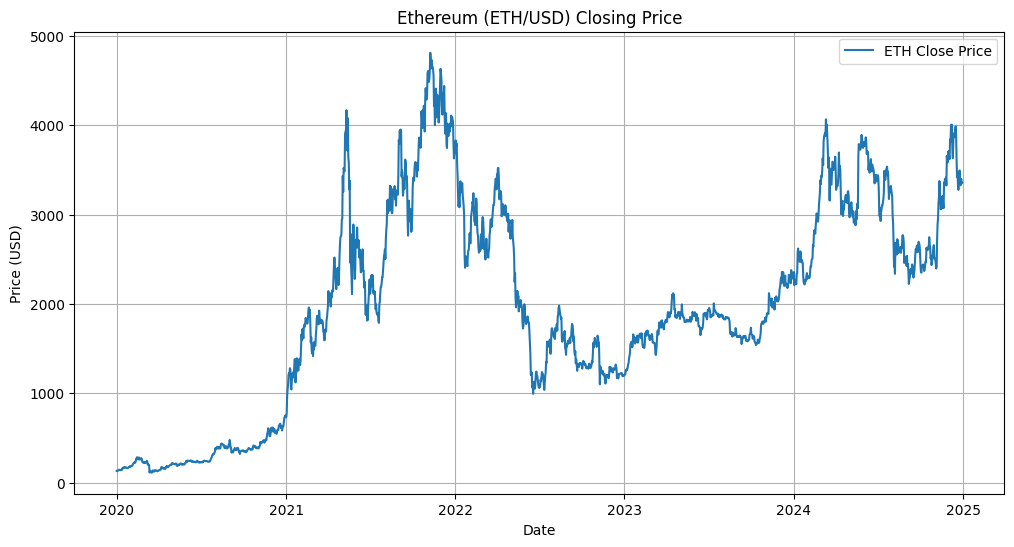

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(eth_data['Close'], label='ETH Close Price')
plt.title('Ethereum (ETH/USD) Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Rolling Mean and Rolling Std Deviation

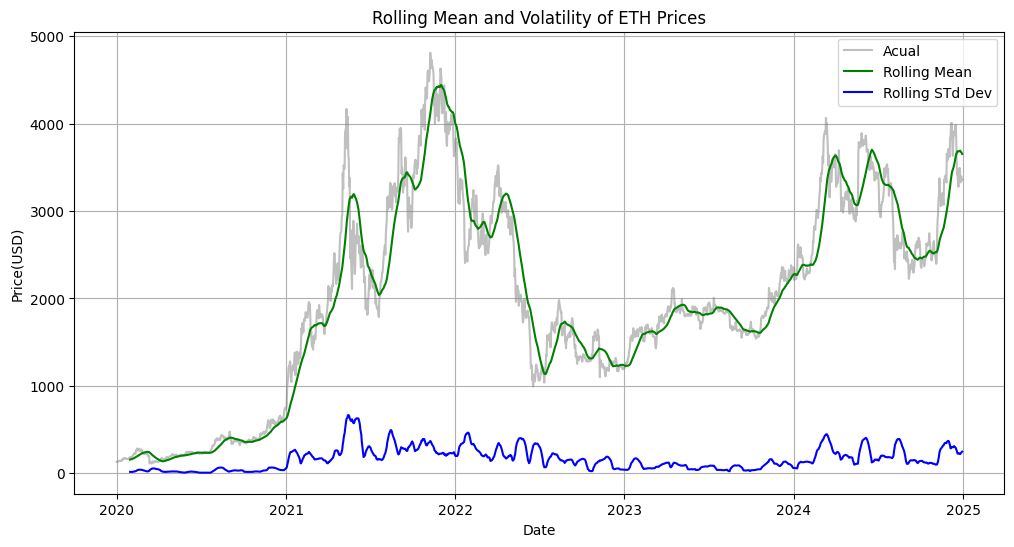

In [14]:
eth_data['RollingMean']=eth_data['Close'].rolling(window=30).mean()
eth_data['RollingStd']=eth_data['Close'].rolling(window=30).std()
plt.figure(figsize=(12,6))
plt.plot(eth_data['Close'],label='Acual',color='gray',alpha=0.5)
plt.plot(eth_data['RollingMean'],label='Rolling Mean',color='green')
plt.plot(eth_data['RollingStd'],label='Rolling STd Dev',color='blue')
plt.title('Rolling Mean and Volatility of ETH Prices')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

Volume Trend Over Time


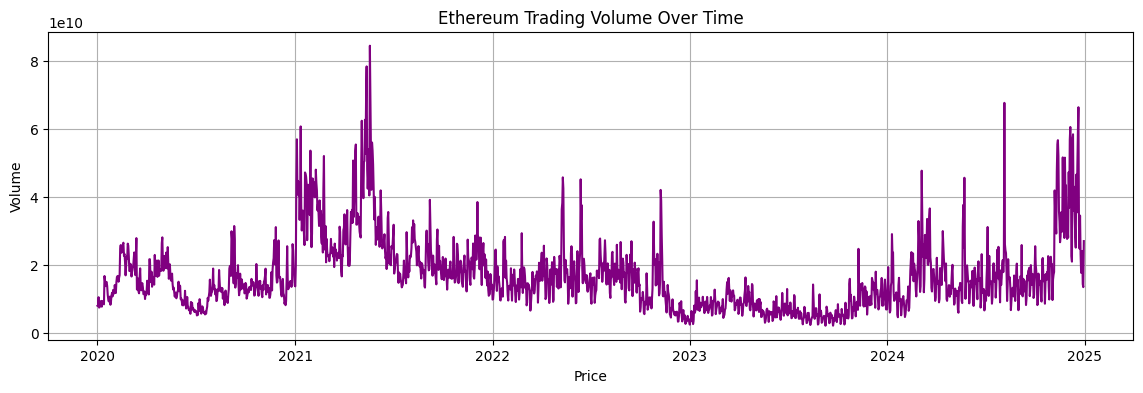

In [15]:
plt.figure(figsize=(14,4))
plt.plot(eth_data['Volume'],color='purple')
plt.title('Ethereum Trading Volume Over Time')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


In [16]:
eth_data[['Open', 'High', 'Low', 'Close', 'Volume']].describe()


,Open,High,Low,Close,Volume
count,1826.000000,1826.000000,1826.000000,1826.000000,1.826000e+03
mean,1980.032840,2033.090281,1922.570778,1981.600074,1.669406e+10
std,1148.003150,1178.978113,1112.597634,1147.276465,1.053916e+10
min,110.406784,116.021622,95.184303,110.605873,2.081626e+09
25%,1250.664185,1281.565033,1211.789398,1251.954102,9.452774e+09
50%,1869.789124,1904.886841,1839.892151,1870.897217,1.459358e+10
75%,2890.993103,2961.298218,2786.070618,2894.424500,2.059002e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


Histogram of Closing Price Distribution

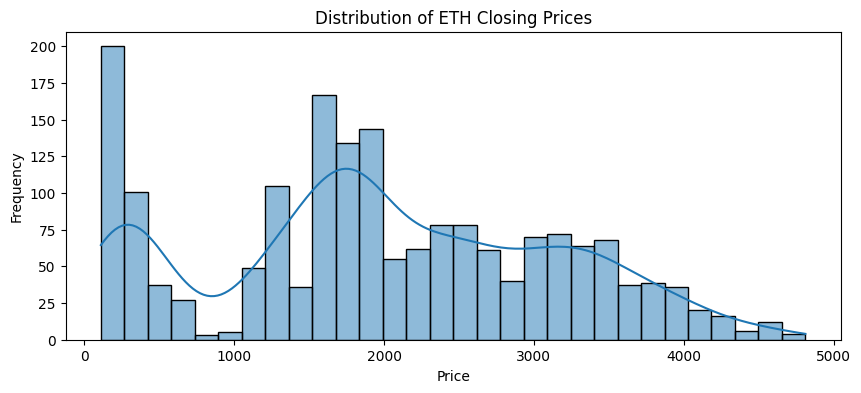

In [17]:
plt.figure(figsize=(10,4))
import seaborn as sns
sns.histplot(eth_data['Close'],bins=30,kde=True)
plt.title('Distribution of ETH Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Boxplot to Detect Outliers

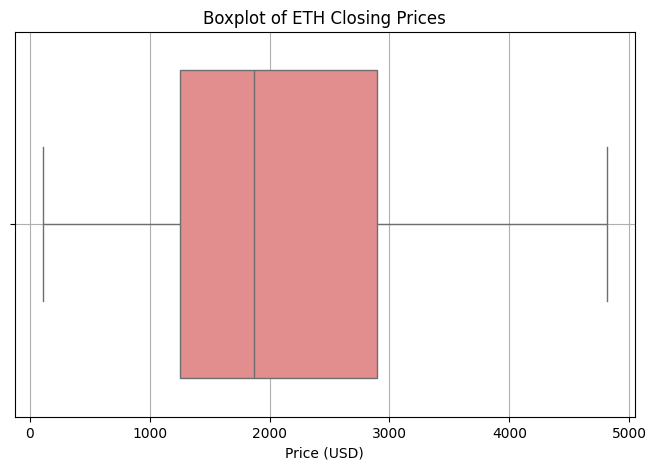

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=eth_data['Close'], color='lightcoral')
plt.title('Boxplot of ETH Closing Prices')
plt.xlabel('Price (USD)')
plt.grid(True)
plt.show()


Stationarity Testing Using ADF Test

In [27]:
from statsmodels.tsa.stattools import adfuller
adf_raw=adfuller(eth_data['Close'])
print('ADF Statistics: ',adf_raw[0])
print('p_value',adf_raw[1])
print('Critical Values: ')
for key,value in adf_raw[4].items():
  print(f'{key}:{value}')


ADF Statistics:  -1.9388719525648033
p_value 0.31400116530566735
Critical Values: 
1%:-3.4339500836471712
5%:-2.8631302362582534
10%:-2.567616588375528


Plot Raw Series

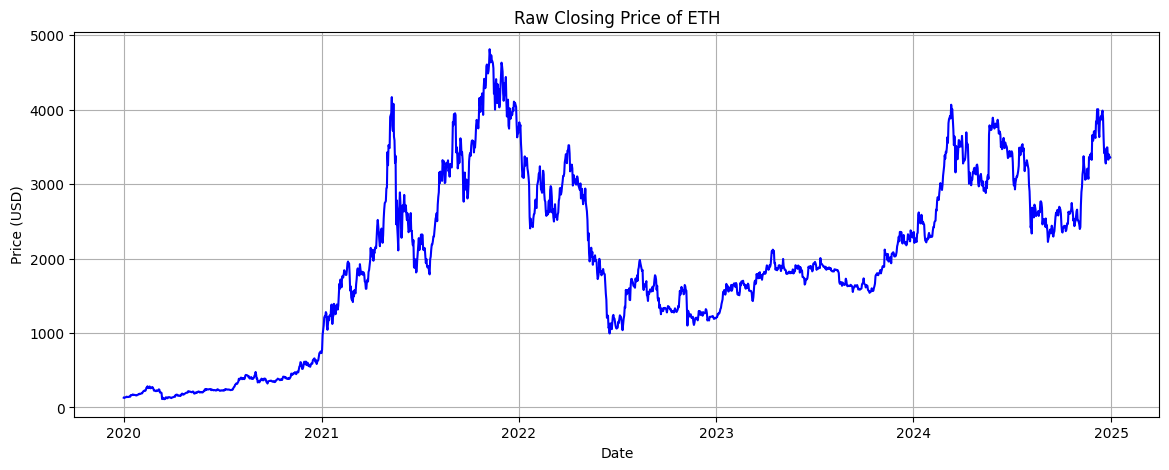

In [28]:
plt.figure(figsize=(14, 5))
plt.plot(eth_data['Close'], color='blue')
plt.title('Raw Closing Price of ETH')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


First-Order Differencing

In [34]:
eth_data['Close_diff1']=eth_data['Close'].diff()
diff_series=eth_data['Close_diff1'].dropna()
adf_result=adfuller(diff_series)
print('ADF Statistics',adf_result[0])
print("p_value",adf_result[1])
print('Critical Values:')
for key,value in adf_result[4].items():
  print(f'{key}: {value}')

ADF Statistics -16.72498773248956
p_value 1.3983797761380692e-29
Critical Values:
1%: -3.4339500836471712
5%: -2.8631302362582534
10%: -2.567616588375528


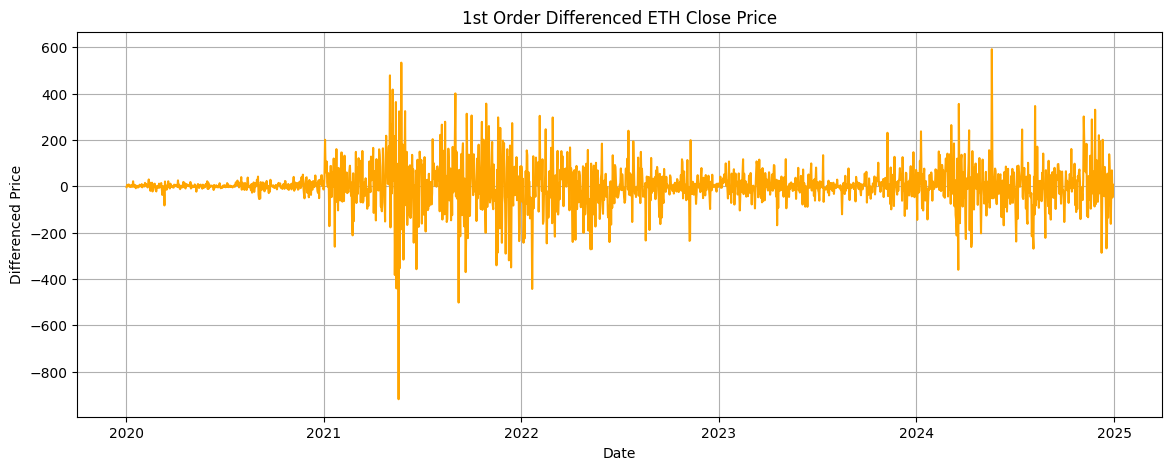

In [35]:
plt.figure(figsize=(14, 5))
plt.plot(diff_series, color='orange')
plt.title('1st Order Differenced ETH Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.grid(True)
plt.show()


In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [21]:
import warnings
warnings.filterwarnings("ignore")

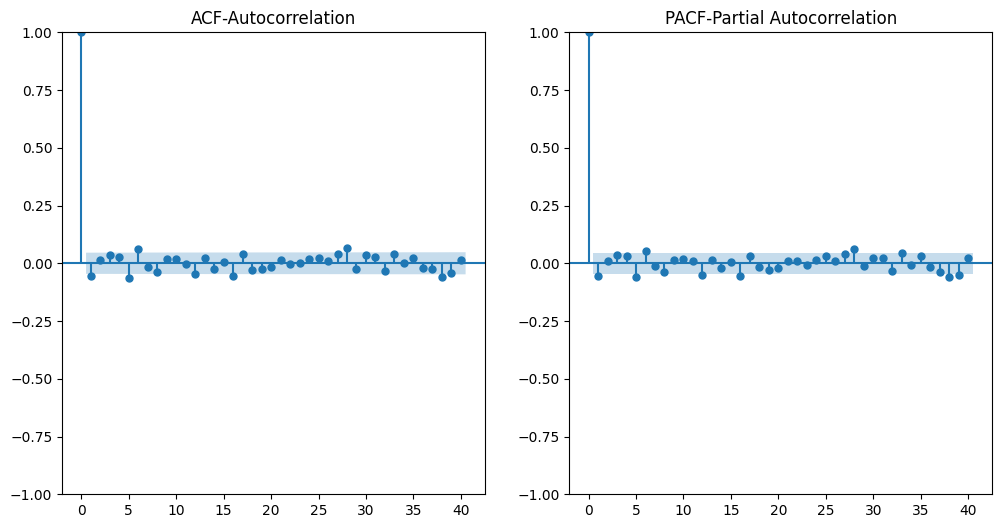

In [37]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
plot_acf(eth_data['Close_diff1'].dropna(),ax=ax[0],lags=40)
ax[0].set_title('ACF-Autocorrelation')

plot_pacf(eth_data['Close_diff1'].dropna(),ax=ax[1],lags=40)
ax[1].set_title('PACF-Partial Autocorrelation')
plt.show()

aaply arima

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(eth_data['Close'],order=(1,1,1))
model_fit=model.fit()

In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10858.888
Date:                Sun, 29 Jun 2025   AIC                          21723.777
Time:                        14:49:12   BIC                          21740.305
Sample:                    01-01-2020   HQIC                         21729.874
                         - 12-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1592      0.245     -0.651      0.515      -0.639       0.320
ma.L1          0.1052      0.247      0.425      0.671      -0.380       0.590
sigma2      8641.2504    123.189     70.146      0.000    8399.804    8882.696
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7564.79
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.45
Prob(H) (two-sided):                  0.09   Kurtosis:                        12.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

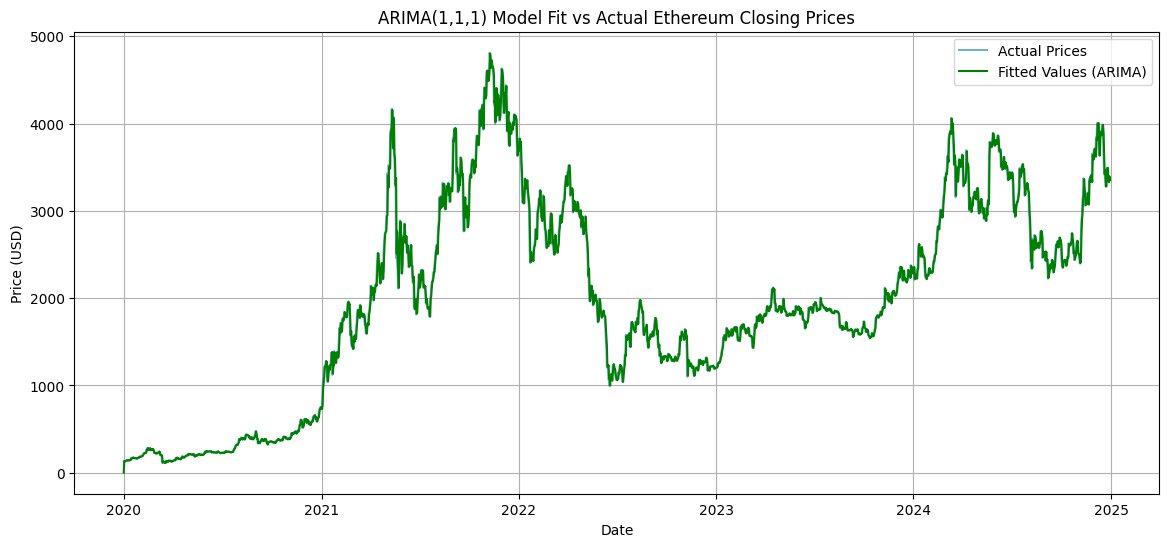

In [47]:
plt.figure(figsize=(14, 6))
plt.plot(eth_data['Close'], label='Actual Prices', alpha=0.6)
plt.plot(model_fit.fittedvalues, label='Fitted Values (ARIMA)', color='green')
plt.title('ARIMA(1,1,1) Model Fit vs Actual Ethereum Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [51]:
fitted=model_fit.fittedvalues
actual=eth_data['Close']

fitted_align=fitted
actual_align=actual[fitted.index]

In [55]:
import numpy as np
rmse=np.sqrt(mean_squared_error(actual_align,fitted_align))
mape=mean_absolute_percentage_error(actual_align,fitted_align)
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 92.88896022548579
MAPE: 0.030065996436982184


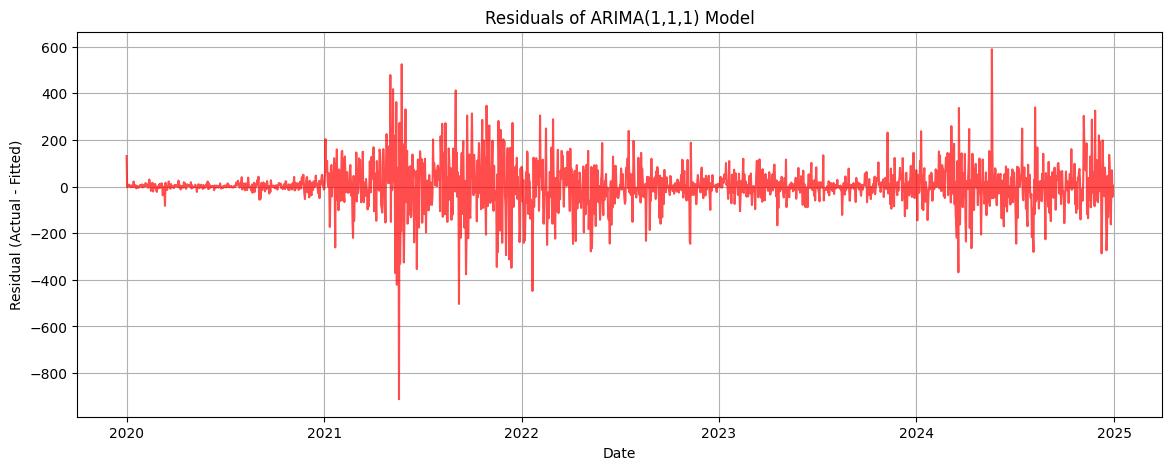

In [57]:
residuals = actual_align - fitted_align

plt.figure(figsize=(14, 5))
plt.plot(residuals, color='red', alpha=0.7)
plt.title('Residuals of ARIMA(1,1,1) Model')
plt.xlabel('Date')
plt.ylabel('Residual (Actual - Fitted)')
plt.grid(True)
plt.show()


ForeCasting

In [68]:
forecast_result=model_fit.get_forecast(steps=30)
forecast_mean=forecast_result.predicted_mean
conf_int=forecast_result.conf_int()
print(conf_int)

            lower Close  upper Close
2024-12-31  3173.510970  3537.900913
2025-01-01  3105.013549  3606.616931
2025-01-02  3050.592479  3661.003205
2025-01-03  3004.641843  3706.959380
2025-01-04  2964.024171  3747.576170
2025-01-05  2927.241969  3784.358512
2025-01-06  2893.375858  3818.224601
2025-01-07  2861.826192  3849.774271
2025-01-08  2832.174016  3879.426446
2025-01-09  2804.113298  3907.487164
2025-01-10  2777.412358  3934.188104
2025-01-11  2751.890808  3959.709654
2025-01-12  2727.404933  3984.195529
2025-01-13  2703.838031  4007.762431
2025-01-14  2681.093798  4030.506664
2025-01-15  2659.091662  4052.508800
2025-01-16  2637.763401  4073.837061
2025-01-17  2617.050646  4094.549816
2025-01-18  2596.902999  4114.697463
2025-01-19  2577.276584  4134.323878
2025-01-20  2558.132927  4153.467535
2025-01-21  2539.438064  4172.162398
2025-01-22  2521.161838  4190.438624
2025-01-23  2503.277324  4208.323138
2025-01-24  2485.760366  4225.840096
2025-01-25  2468.589193  4243.011269
2

In [63]:
last_date = eth_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)


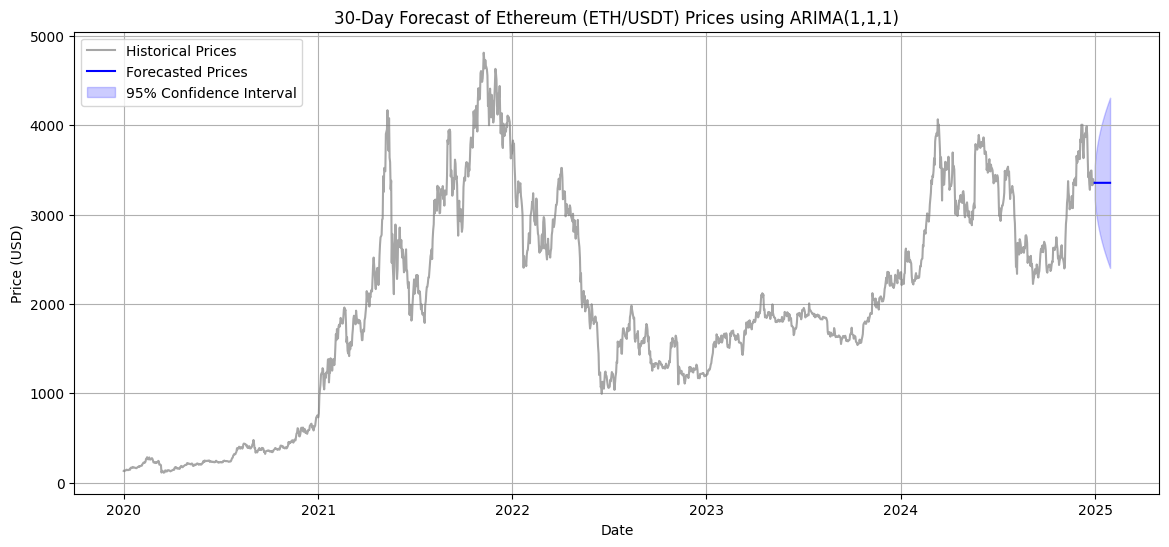

In [69]:
plt.figure(figsize=(14, 6))
plt.plot(eth_data['Close'], label='Historical Prices', color='gray', alpha=0.7)
plt.plot(forecast_dates, forecast_mean, label='Forecasted Prices', color='blue')

# Plot confidence intervals
plt.fill_between(forecast_dates,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='blue', alpha=0.2, label='95% Confidence Interval')

plt.title('30-Day Forecast of Ethereum (ETH/USDT) Prices using ARIMA(1,1,1)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close': forecast_mean,
    'Lower_Bound': conf_int.iloc[:, 0],
    'Upper_Bound': conf_int.iloc[:, 1]
})
forecast_df.set_index('Date', inplace=True)
forecast_df.head()


,Forecasted_Close,Lower_Bound,Upper_Bound
Date,,,
2024-12-31,3355.705941,3173.510970,3537.900913
2025-01-01,3355.815240,3105.013549,3606.616931
2025-01-02,3355.797842,3050.592479,3661.003205
2025-01-03,3355.800611,3004.641843,3706.959380
2025-01-04,3355.800171,2964.024171,3747.576170
